In [13]:
import sqlite3
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
conn = sqlite3.connect('../max-experiments/itinerary-scraping/journeys.db')
c = conn.cursor()

In [4]:
c.execute('SELECT * FROM journeys')
rows = c.fetchall()
df = gpd.GeoDataFrame(rows, columns=['id', 'total_duration', 'start_datetime', 'end_datetime', 'gec', 'nox_pm', 'method_1', 'method_2', 'path'])
df.head()

,id,total_duration,start_datetime,end_datetime,gec,nox_pm,method_1,method_2,path
0,1,2972,20240525T175138,20240525T184110,"{""value"": 933.1212, ""unit"": ""gEC""}","{""unit"": ""g"", ""values"": {""nox"": 0, ""pm"": 0}}","{""total"": 2972, ""walking"": 1232, ""bike"": 0, ""c...","{""walking"": 272, ""bike"": 0, ""car"": 0, ""ridesha...","[{""stop_point"": ""Libert\u00e9"", ""arrival_date_..."
1,2,2636,20240525T173733,20240525T182129,"{""value"": 380.232, ""unit"": ""gEC""}","{""unit"": ""g"", ""values"": {""nox"": 0, ""pm"": 0}}","{""total"": 2636, ""walking"": 1436, ""bike"": 0, ""c...","{""walking"": 612, ""bike"": 0, ""car"": 0, ""ridesha...","[{""stop_point"": ""Pont de La Mulati\u00e8re"", ""..."
2,3,3025,20240525T174745,20240525T183810,"{""value"": 558.0722, ""unit"": ""gEC""}","{""unit"": ""g"", ""values"": {""nox"": 0, ""pm"": 0}}","{""total"": 3025, ""walking"": 1945, ""bike"": 0, ""c...","{""walking"": 586, ""bike"": 0, ""car"": 0, ""ridesha...","[{""stop_point"": ""Petit Versailles"", ""arrival_d..."
3,4,3685,20240525T174745,20240525T184910,"{""value"": 726.4134, ""unit"": ""gEC""}","{""unit"": ""g"", ""values"": {""nox"": 0, ""pm"": 0}}","{""total"": 3685, ""walking"": 1585, ""bike"": 0, ""c...","{""walking"": 586, ""bike"": 0, ""car"": 0, ""ridesha...","[{""stop_point"": ""Petit Versailles"", ""arrival_d..."
4,5,3685,20240525T174745,20240525T184910,"{""value"": 705.801, ""unit"": ""gEC""}","{""unit"": ""g"", ""values"": {""nox"": 0, ""pm"": 0}}","{""total"": 3685, ""walking"": 1525, ""bike"": 0, ""c...","{""walking"": 586, ""bike"": 0, ""car"": 0, ""ridesha...","[{""stop_point"": ""Petit Versailles"", ""arrival_d..."


In [5]:
# remove rows that are outliers in terms of total_duration
q1 = df['total_duration'].quantile(0.25)
q3 = df['total_duration'].quantile(0.75)
iqr = q3 - q1
df = df[(df['total_duration'] > (q1 - 1.5 * iqr)) & (df['total_duration'] < (q3 + 1.5 * iqr))]

In [7]:
gEC = []
for row in df['gec']:
    gEC.append(row.split(' ')[1].split(',')[0])
    
gEC = [float(i) for i in gEC]

Correlation coefficient: 0.701
Equation of trendline:  
0.2786 x - 317.2


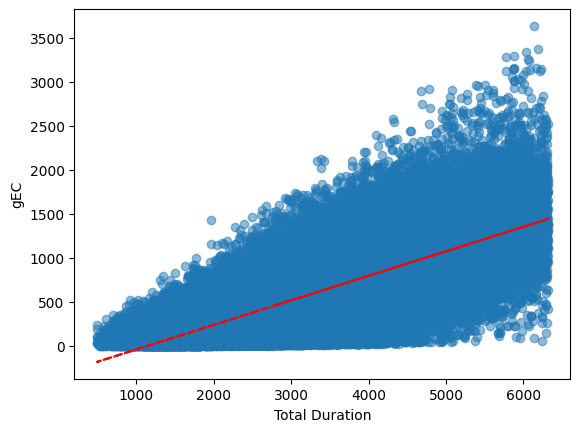

In [21]:
# plot gEC vs total_duration
plt.scatter(df['total_duration'], gEC, alpha=0.5)
plt.xlabel('Total Duration')
plt.ylabel('gEC')

# trendline with correlation coefficient
z = np.polyfit(df['total_duration'], gEC, 1)
p = np.poly1d(z)
plt.plot(df['total_duration'],p(df['total_duration']),"r--")
print('Correlation coefficient:', round(np.corrcoef(df['total_duration'], gEC)[0, 1], 3))
print('Equation of trendline:', p)

In [9]:
# plot gEC vs hour of day
start_times = []
for row in df['start_datetime']:
    # HHMMSS
    time = int(row.split('T')[1])
    time = time // 10000
    start_times.append(time)

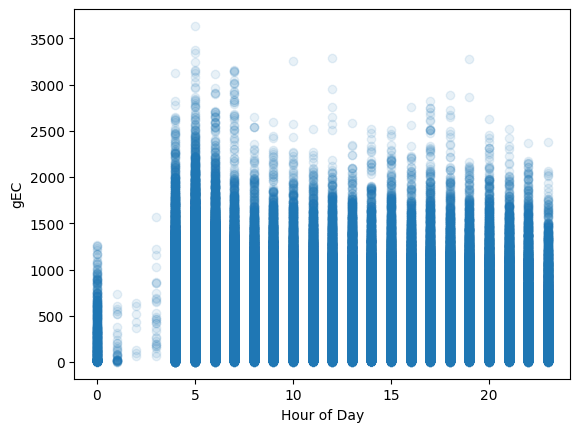

In [10]:
plt.scatter(start_times, gEC, alpha=0.1)
plt.xlabel('Hour of Day')
plt.ylabel('gEC')
plt.show()

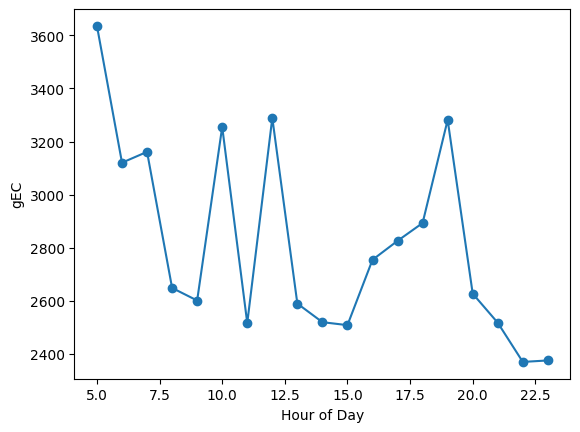

In [11]:
# line graph of max gEC vs hour of day
max_gEC = []
for i in range(5,24):
    max_gEC.append(max([gEC[j] for j in range(len(gEC)) if start_times[j] == i]))
    
plt.plot(range(5,24), max_gEC, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('gEC')
plt.show()

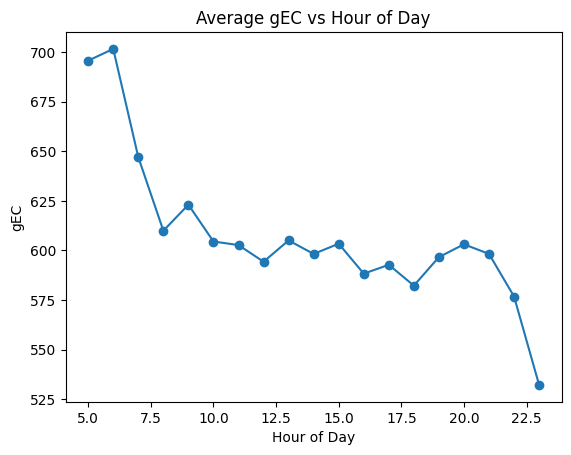

In [12]:
# line graph of average gEC vs hour of day
avg_gEC = []
for i in range(5,24):
    avg_gEC.append(sum([gEC[j] for j in range(len(gEC)) if start_times[j] == i]) / len([gEC[j] for j in range(len(gEC)) if start_times[j] == i]))
    
plt.plot(range(5,24), avg_gEC, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('gEC')
plt.title('Average gEC vs Hour of Day')
plt.show()